In [1]:
import os
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# This is for the Cluster

Going to test my new algorithm on the cluster. 

/Users/mattocallaghan/miniforge3/envs/astro/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (11,12,15,16,17,18) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


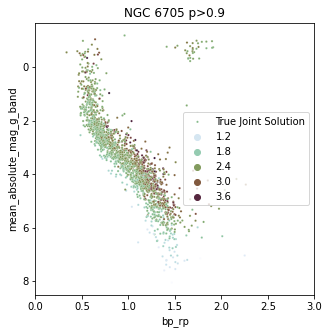

In [2]:
os.chdir("Data")
cluster_df=pd.read_csv('cluster_members_final.csv')
os.chdir("../")


probability='p3'
f, axes = plt.subplots(1, 1)
f.set_figheight(5)
f.set_figwidth(5)

cluster_df=cluster_df[cluster_df['phot_bp_mean_flux_error']<1000].reset_index(drop=True)

scatter=cluster_df[cluster_df[probability]>0.9]


sn.scatterplot(x=scatter['bp_rp'],y=scatter['mean_absolute_mag_g_band'],hue=scatter['rgeo'],s=5,ax=axes,label='True Joint Solution',color='b', palette="ch:r=1,l=1.0")
axes.invert_yaxis()
plt.legend()
axes.set_title("NGC 6705 p>0.9")
plt.xlim(0,3)
plt.show()


scatter=scatter[scatter['rgeo']>=1.8].reset_index(drop=True)
scatter=scatter[scatter['rgeo']<=2.5].reset_index(drop=True)
#scatter=scatter[scatter['bp_rp']<=1.6].reset_index(drop=True)

orig_scatter=scatter

orig_scatter['rgeo']=scatter['rgeo'].median() #still assuming everything at the same distance
#set the main distance.
orig_scatter['rgeo']=2.0

cluster_df=scatter

In [3]:
cluster_df=cluster_df[['ra','dec','parallax','phot_g_mean_mag','phot_g_mean_flux','phot_rp_mean_flux','phot_bp_mean_flux','phot_bp_mean_mag','phot_rp_mean_mag','bp_rp','mean_absolute_mag_g_band','ra_error','dec_error','parallax_error','phot_g_mean_flux_error','phot_bp_mean_flux_error','phot_rp_mean_flux_error']].reset_index(drop=True)
cluster_df


,ra,dec,parallax,phot_g_mean_mag,phot_g_mean_flux,phot_rp_mean_flux,phot_bp_mean_flux,phot_bp_mean_mag,phot_rp_mean_mag,bp_rp,mean_absolute_mag_g_band,ra_error,dec_error,parallax_error,phot_g_mean_flux_error,phot_bp_mean_flux_error,phot_rp_mean_flux_error
0,282.605871,-6.285981,0.507387,16.404120,5.167716e+03,3876.549346,2425.859397,16.876379,15.776782,1.099597,4.856261,0.049640,0.053262,0.068056,3.639983,10.207194,14.392979
1,282.610660,-6.223920,0.414973,15.952048,7.836598e+03,5993.184109,3729.496588,16.409416,15.303751,1.105665,4.090620,0.042647,0.041917,0.053403,4.474360,15.521529,8.868863
2,282.610679,-6.250028,0.464578,16.118809,6.720840e+03,5265.982076,3198.065088,16.576324,15.444197,1.132128,4.479413,0.045167,0.044909,0.052555,3.836132,10.380806,18.499730
3,282.615905,-6.195400,0.455174,16.738075,3.799412e+03,3552.040656,1709.063662,17.256647,15.871700,1.384947,4.786609,0.064142,0.066674,0.092999,4.374199,9.564557,21.343086
4,282.617394,-6.285022,0.386008,14.585701,2.758459e+04,17640.015588,15755.160439,14.844985,14.131648,0.713337,2.684100,0.021657,0.020979,0.025863,10.341982,28.872372,83.859900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,282.792623,-6.051856,0.424239,13.486980,7.588484e+04,53535.371005,38981.029432,13.861409,12.926293,0.935116,1.804319,0.016018,0.016901,0.021350,21.492193,38.411700,44.480198
1097,282.840875,-6.043056,0.533869,16.632505,4.187401e+03,3402.451865,1810.603897,17.193983,15.918415,1.275568,5.241502,0.064591,0.069871,0.086673,3.368146,15.695131,20.524431
1098,282.844474,-6.035441,0.555500,17.378784,2.105878e+03,1859.903861,834.630940,18.034805,16.574170,1.460636,5.682174,0.087949,0.103732,0.129928,2.685649,8.458553,20.671124
1099,282.856958,-6.023364,0.436901,10.448225,1.246398e+06,888703.772511,633674.511865,10.833877,9.876003,0.957873,-1.190251,0.013677,0.013188,0.015801,297.194850,543.663600,344.572200


# Errors as per Gaia recommendations for the Photometric effects

In [4]:
cluster_df['phot_g_mean_mag_error']=np.sqrt(((2.5/np.log(10))*cluster_df['phot_g_mean_flux_error']/cluster_df['phot_g_mean_flux'])**2+0.0027553202**2)
cluster_df['bp_error']=np.sqrt(((2.5/np.log(10))*cluster_df['phot_bp_mean_flux_error']/cluster_df['phot_bp_mean_flux'])**2+0.0037793818**2)
cluster_df['rp_error']=np.sqrt(((2.5/np.log(10))*cluster_df['phot_rp_mean_flux_error']/cluster_df['phot_rp_mean_flux'])**2+0.0027901700**2)
cluster_df['bp_rp_error']=np.sqrt(cluster_df['rp_error']**2+cluster_df['bp_error']**2)

# Feature scaling might be important 

However, we can (I think) just untransform before the likelihood is done. Provided Pytorch allows us to propegate backwards through a scaling operation. I suppose we can actually just do manual scaling using Pytorch operations for MinMaxScaler and that would be fine.

# Data format

(batch size, sequence length, input dimension)
LSTMs learn ? over a longer period of time so my distance data will be batch_size, 1, 1,.

Circular lstm kind of thing? Anyway for now we say the only long term memory that is needed is the distance. Ra and Dec is somehting there but thats a local correlation and I'll try include that in the error function


# Draw instances of each row.

We will draw instances from a Gaussian of each row to simulate the error in our data.

#### Prior on Distance

We will need some sort of prior on distances. In this problem our distances are fairly tuned so I will just invert the parallax as the distance.

(array([492., 453., 103.,  31.,  14.,   4.,   2.,   1.,   0.,   1.]),
 array([0.35212121, 0.42885778, 0.50559435, 0.58233092, 0.65906749,
        0.73580406, 0.81254063, 0.8892772 , 0.96601377, 1.04275034,
        1.11948691]),
 <BarContainer object of 10 artists>)

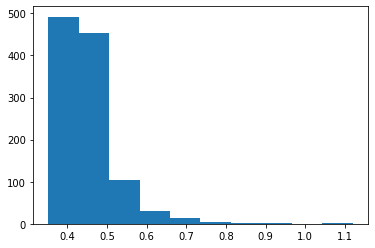

In [5]:
plt.hist(cluster_df['parallax'])

#### Normal distribution draws

Eventually should put in the cross correlations but for now isotropic.

In [6]:
mean_x=cluster_df[['ra','dec','parallax','phot_g_mean_mag','bp_rp']].to_numpy()
var_x=cluster_df[['ra_error','dec_error','parallax_error','phot_g_mean_mag_error','bp_rp_error']].to_numpy()**2

In [7]:
x_params=[]
x_var=[]
draw_size=32
for i in range (len(mean_x)):
    mu=mean_x[i]
    sig=np.diag(var_x[i])
    draws = np.random.multivariate_normal(mu, sig, size=draw_size)

    x_params.append(draws)
    x_var.append(np.tile(sig,(draw_size,1)))


In [8]:
x_params=np.array(x_params)
x_params=x_params.reshape((x_params.shape[0]*x_params.shape[1],x_params.shape[2]))


In [9]:
x_var=np.array(x_var)
x_var=x_var.reshape((x_var.shape[0]*x_var.shape[1],x_var.shape[2]))


In [10]:
x_params.shape

(35232, 5)

In [11]:
resampled_x=pd.DataFrame(data=x_params,columns=[['ra','dec','parallax','phot_g_mean_mag','bp_rp']])
resampled_err=pd.DataFrame(data=x_params,columns=[['ra_error','dec_error','parallax_error','phot_g_mean_mag_error','bp_rp_error']])
resampled_x['ra']=resampled_x['ra']%360
resampled_x['dec']=resampled_x['dec']%360

In [12]:
def mean_basolute_mag_g_band(selection_gaia):

    return selection_gaia['phot_g_mean_mag'].values+5*np.log10(selection_gaia['parallax'].values/1000)+5
    

resampled_x['G']=mean_basolute_mag_g_band(resampled_x)
cluster_df['G']=mean_basolute_mag_g_band(cluster_df)


/var/folders/tm/gnjj0w_d6vj9x6q_ww3f6jsw0000gn/T/ipykernel_5213/4156368074.py:3: RuntimeWarning: invalid value encountered in log10
  return selection_gaia['phot_g_mean_mag'].values+5*np.log10(selection_gaia['parallax'].values/1000)+5


In [13]:
x_resample=pd.concat([resampled_x,resampled_err],axis=1)

In [14]:
x_resample

,ra,dec,parallax,phot_g_mean_mag,bp_rp,G,ra_error,dec_error,parallax_error,phot_g_mean_mag_error,bp_rp_error
0,282.559903,353.752047,0.484249,16.400737,1.096158,4.826080,282.559903,353.752047,0.484249,16.400737,1.096158
1,282.591376,353.734148,0.587073,16.407373,1.105461,5.250832,282.591376,353.734148,0.587073,16.407373,1.105461
2,282.542478,353.662518,0.642151,16.405472,1.107999,5.443656,282.542478,353.662518,0.642151,16.405472,1.107999
3,282.616718,353.827684,0.551635,16.407704,1.087676,5.115962,282.616718,353.827684,0.551635,16.407704,1.087676
4,282.515858,353.698736,0.544009,16.402835,1.093802,5.080867,282.515858,353.698736,0.544009,16.402835,1.093802
...,...,...,...,...,...,...,...,...,...,...,...
35227,282.819291,354.011857,0.371734,17.501535,1.681730,5.352696,282.819291,354.011857,0.371734,17.501535,1.681730
35228,282.765090,354.247193,0.412894,17.507468,1.672848,5.586658,282.765090,354.247193,0.412894,17.507468,1.672848
35229,282.855173,354.076293,0.642691,17.504265,1.653288,6.544275,282.855173,354.076293,0.642691,17.504265,1.653288
35230,282.646254,354.109008,0.333944,17.500747,1.629356,5.119112,282.646254,354.109008,0.333944,17.500747,1.629356


# Error understanding


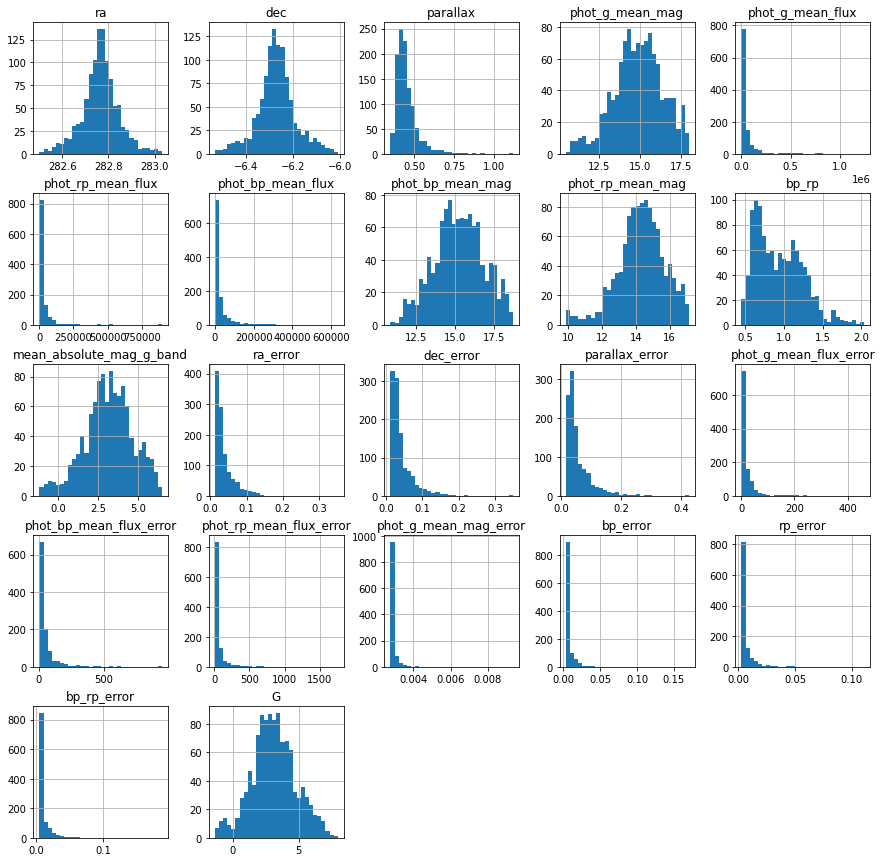

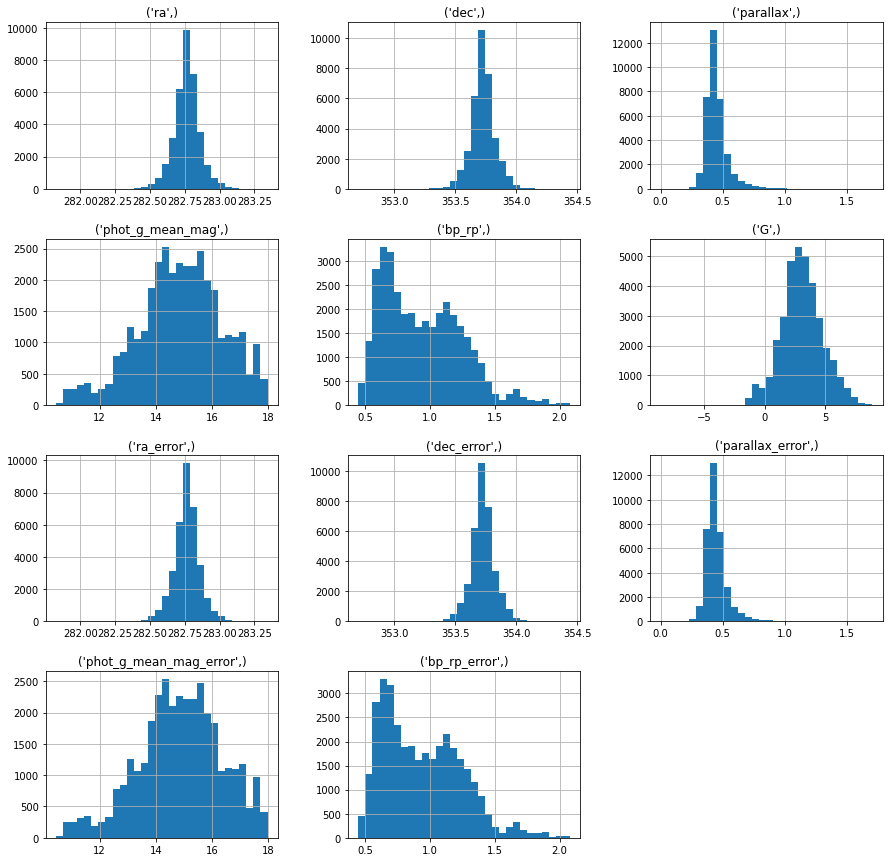

In [15]:
cluster_df.hist(bins=30, figsize=(15, 15))
x_resample.hist(bins=30, figsize=(15, 15))
plt.show()

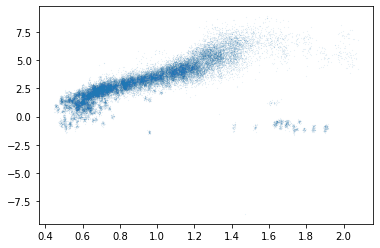

In [16]:
plt.scatter(x_resample['bp_rp'],x_resample['G'],s=0.001)

In [17]:
x_resample=x_resample.dropna().reset_index(drop=True)

# Isochrone preparing

The goal here is to derive the likelihood function easily.

In [18]:
import minimint

In [19]:
filters = ["Gaia_G_EDR3", "Gaia_BP_EDR3", 'Gaia_RP_EDR3']
ii = minimint.Interpolator(filters)


In [20]:
# Compute the isochrones
massgrid = 10*np.linspace(np.log10(0.1),np.log10(10), 1000)
logagegrid = [8.5,8.0,7.0]
fehgrid = [0.17,-1,-0.5]
dfs=[]
for feh in fehgrid:
    for lage in logagegrid:
        iso = pd.DataFrame(ii(massgrid, lage, feh))
        dfs.append(iso[iso['phase']==0])

# Fixed metalicity and age.

We will do for a fixed value that we are confident enough on. This is much easier as we only have one array.

In [21]:
# Compute the isochrones
massgrid = 10*np.linspace(np.log10(0.1),np.log10(10), 1000)
logagegrid = [8.0,8.1,8.3,8.5]
fehgrid = [0.17]
dfs=[]
for feh in fehgrid:
    for lage in logagegrid:
        iso = pd.DataFrame(ii(massgrid, lage, feh))
        dfs.append(iso[iso['phase']==0])

In [22]:
isochrone=dfs[0]

In [23]:
resampled_x

,ra,dec,parallax,phot_g_mean_mag,bp_rp,G
0,282.559903,353.752047,0.484249,16.400737,1.096158,4.826080
1,282.591376,353.734148,0.587073,16.407373,1.105461,5.250832
2,282.542478,353.662518,0.642151,16.405472,1.107999,5.443656
3,282.616718,353.827684,0.551635,16.407704,1.087676,5.115962
4,282.515858,353.698736,0.544009,16.402835,1.093802,5.080867
...,...,...,...,...,...,...
35227,282.819291,354.011857,0.371734,17.501535,1.681730,5.352696
35228,282.765090,354.247193,0.412894,17.507468,1.672848,5.586658
35229,282.855173,354.076293,0.642691,17.504265,1.653288,6.544275
35230,282.646254,354.109008,0.333944,17.500747,1.629356,5.119112


(8.0, -3.0)

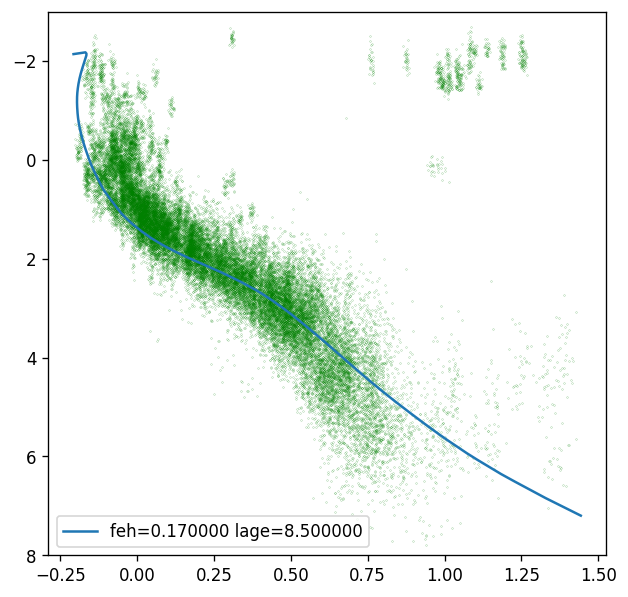

In [24]:
fig = plt.figure(figsize=(6, 6), dpi=120)

plt.plot(isochrone['Gaia_BP_EDR3']-isochrone['Gaia_RP_EDR3'], isochrone['Gaia_G_EDR3'],
                 label='feh=%f lage=%f' % (feh, lage))
plt.scatter(resampled_x['bp_rp']-0.65,resampled_x['G']-1.1,color='g',s=0.01)
plt.legend()

plt.ylim(8, -3)

# VAE star

In [25]:
import torch
import torch.nn as nn
device='mps'

torch.backends.mps.is_available()

True

In [ ]:
class encoder(nn.Module):
    def __init__(self, input_dim, latent_dim, hidden_dim):
        super(encoder,self).__init__()

        self.lstm=nn.LSTM()
        self.

